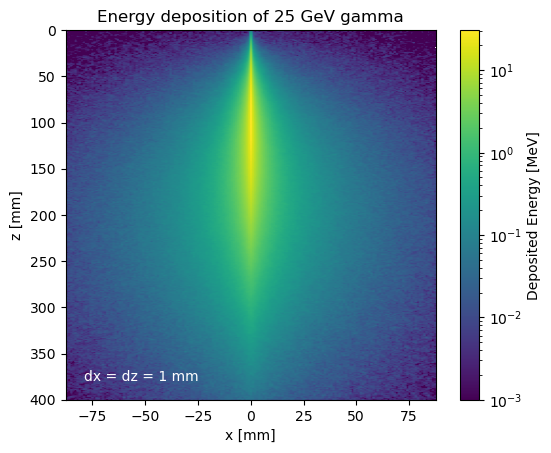

In [16]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
# %matplotlib widget

def drawDepthHist(eDepFileTitle, rootFileTitle, particle, energy):

    #################################
    ## root file and data frame
    #################################

    tree = uproot.open(f"{rootFileTitle}_{particle}_{energy}GeV_depth.root")["Eecs"]
    df = tree.arrays(library="np")
 
    treeEdep = uproot.open(f"{rootFileTitle}_{particle}_{energy}GeV_depth.root")["Edep"]
    eEscInEvent = treeEdep.arrays(["eDep"], library="np")
    eEscInEvent = energy*1000-eEscInEvent["eDep"]


    number_of_events = np.max(df['evntID'])+1

    escapedEnergy = np.sum(df['escE'])/number_of_events

    #################################
    ## eDep File & eDep mesh
    #################################

    nDivisionsXY = 175
    nDivisionsZ  = 400
    nDivisionsR = 88
    sLength = 87.5
    lLength = 400

    fileEdep = open(f"{eDepFileTitle}_{particle}_{energy}GeV_Box_depth.txt")

    mesh = np.zeros((nDivisionsXY, nDivisionsZ))

    fileEdep.readline() # skip 3 firts lines
    fileEdep.readline()
    fileEdep.readline()

    for line in fileEdep:
        lineSplit = line.split(",")

        ix = int(lineSplit[0])
        iz = int(lineSplit[2])

        eDep = float(lineSplit[3])

        mesh[ix, iz] += eDep

    mesh/=number_of_events

    plt.figure(figsize=(6.4, 4.8))
    plt.imshow(np.transpose(mesh), extent=(-sLength, sLength, 0, lLength), norm=colors.LogNorm(vmin=1e-3),aspect=2*sLength/lLength)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("Deposited Energy [MeV]")
    plt.xlabel("x [mm]")
    plt.ylabel("z [mm]")
    plt.ylim(lLength, 0)
    plt.title(f"Energy deposition of {energy} GeV {particle}")
    ax = plt.gca()
    ax.text(0.05, 0.05, "dx = dz = 1 mm", transform=ax.transAxes, color="white")  

drawDepthHist("build/eDep","build/eEsc", "gamma", 25)